In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install NLTK
!pip install sklearn
!pip install regex

Importation des bibliothéques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  La bibliothéque NLP pour nettoyer les données textuelles.
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

# La technique de vectorisation TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Pour la décomposition des données en données d'apprentissage et données du test 
from sklearn.model_selection import train_test_split

# Les bibliothéques des modèles utilisés pour la prédiction 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Le taux de succès 
from sklearn.metrics import accuracy_score

Charger l'ensemble de données pur la détéction des Fakes News 

In [3]:
dataset = pd.read_csv("data.csv")

In [4]:
dataset.shape# Retourne le nombre de lignes et le nombre de colonnes constituent notre jeu de données

(4009, 4)

In [6]:
dataset.head() #  Retourne les 5 premiers ligne de notre jeu de données

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [7]:
dataset.columns# retourne les noms des colonnes qu'existe dans notre dataset

Index(['URLs', 'Headline', 'Body', 'Label'], dtype='object')

In [8]:
dataset['Label'].value_counts()

0    2137
1    1872
Name: Label, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

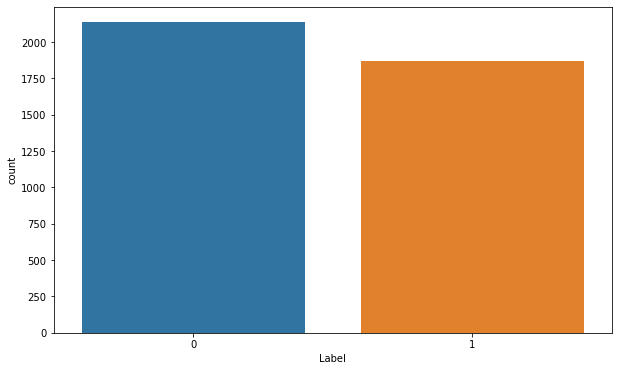

In [11]:
plt.figure(figsize=(10,6))
sns.countplot('Label',data=dataset)

In [12]:
dataset.isnull().sum()#Pour vérifier s'il existe des valeurs nulles

URLs         0
Headline     0
Body        21
Label        0
dtype: int64


## 3.Pré-traitement de données


In [13]:
df = dataset.copy()

In [14]:
df['Body'] = df['Body'].fillna('') 

In [15]:
df.isnull().sum()  

URLs        0
Headline    0
Body        0
Label       0
dtype: int64

## 3.2. L'ajout d'une autre colonne 


In [16]:
df['News'] = df['Headline']+df['Body']

In [17]:
df.head()

,URLs,Headline,Body,Label,News
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,Four ways Bob Corker skewered Donald TrumpImag...
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,Linklater's war veteran comedy speaks to moder...
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,Trump’s Fight With Corker Jeopardizes His Legi...
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,Jason Aldean opens 'SNL' with Vegas tributeCou...


In [18]:
df.columns

Index(['URLs', 'Headline', 'Body', 'Label', 'News'], dtype='object')

In [19]:
df['News'][0]

'Four ways Bob Corker skewered Donald TrumpImage copyright Getty Images\nOn Sunday morning, Donald Trump went off on a Twitter tirade against a member of his own party.\nThis, in itself, isn\'t exactly huge news. It\'s far from the first time the president has turned his rhetorical cannons on his own ranks.\nThis time, however, his attacks were particularly biting and personal. He essentially called Tennessee Senator Bob Corker, the chair of the powerful Senate Foreign Relations Committee, a coward for not running for re-election.\nHe said Mr Corker "begged" for the president\'s endorsement, which he refused to give. He wrongly claimed that Mr Corker\'s support of the Iranian nuclear agreement was his only political accomplishment.\nUnlike some of his colleagues, Mr Corker - free from having to worry about his immediate political future - didn\'t hold his tongue.\nSkip Twitter post by @SenBobCorker It\'s a shame the White House has become an adult day care center. Someone obviously mis

## 3.3. Suppression des caractéristiques non pertinentes

In [20]:
features_dropped = ['URLs','Headline','Body']
df = df.drop(features_dropped, axis =1)

In [21]:
df.columns

Index(['Label', 'News'], dtype='object')

## 3.4. Traitement du texte
1. Suppression des symboles(',','-',...etc)
2. Suppression des (stop words)
3. extraction des caratéréstiques

In [23]:
ps = PorterStemmer()
def wordopt(text):
    text = re.sub('[^a-zA-Z]', ' ',text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    return text

In [24]:
df['News'] = df['News'].apply(wordopt) #Applying the text processing techniques onto every row data

In [25]:
df.head()

,Label,News
0,1,four way bob corker skewer donald trumpimag co...
1,1,linklat war veteran comedi speak modern americ...
2,1,trump fight corker jeopard legisl agendath feu...
3,1,egypt cheiron win tie pemex mexican onshor oil...
4,1,jason aldean open snl vega tributecountri sing...


In [26]:
df['News'][0]

'four way bob corker skewer donald trumpimag copyright getti imag sunday morn donald trump went twitter tirad member parti exactli huge news far first time presid turn rhetor cannon rank time howev attack particularli bite person essenti call tennesse senat bob corker chair power senat foreign relat committe coward run elect said mr corker beg presid endors refus give wrongli claim mr corker support iranian nuclear agreement polit accomplish unlik colleagu mr corker free worri immedi polit futur hold tongu skip twitter post senbobcork shame white hous becom adult day care center someon obvious miss shift morn senat bob corker senbobcork octob report end though spoke new york time realli let presid four choic quot tennesse senat interview time particularli damn know presid tweet thing true know everyon know realli sugarcoat one mr corker flat say presid liar everyon know senat particular challeng mr trump insist unsuccess plead endors accus much broader mr corker presid use someth akin 

Décomposition de DataSet

In [27]:
X = df['News']
Y = df['Label']

#Décomposer le dataset en training set et test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

Vectorisation

In [28]:
#Vectorisation
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [29]:
from sklearn.metrics import plot_confusion_matrix, classification_report,accuracy_score

In [30]:
#création d'une fonction pour afficher les métriques de bases

def report(model):
    pred = model.predict(xv_test)
    print(classification_report(y_test,pred))
    plot_confusion_matrix(model, xv_test, y_test)

Accuracy of LR model is: 96.71%
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       558
           1       0.94      0.98      0.96       445

    accuracy                           0.97      1003
   macro avg       0.97      0.97      0.97      1003
weighted avg       0.97      0.97      0.97      1003



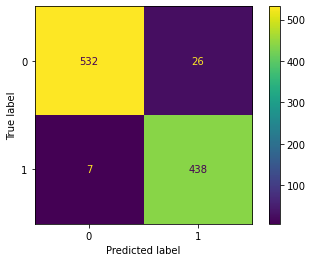

In [138]:
LR_model = LogisticRegression()


LR_model.fit(xv_train,y_train)


lr_y_pred = LR_model.predict(xv_test)

score = accuracy_score(y_test,lr_y_pred)
print(f'Accuracy of LR model is: {round(score*100,2)}%')
report(LR_model)

In [31]:
from sklearn.naive_bayes import MultinomialNB

Accuracy of MultinomialNB model is: 93.72%
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       545
           1       0.90      0.97      0.93       458

    accuracy                           0.94      1003
   macro avg       0.94      0.94      0.94      1003
weighted avg       0.94      0.94      0.94      1003



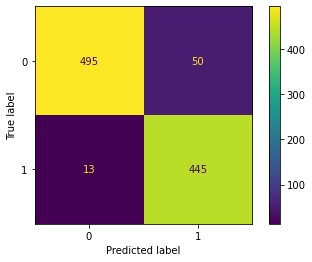

In [32]:
NB = MultinomialNB()

NB.fit(xv_train,y_train)

NB_y_pred = NB.predict(xv_test)

score = accuracy_score(y_test,NB_y_pred )
print(f'Accuracy of MultinomialNB model is: {round(score*100,2)}%')
report(NB)

Accuracy of DecisionTree model is: 95.31%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       545
           1       0.95      0.95      0.95       458

    accuracy                           0.95      1003
   macro avg       0.95      0.95      0.95      1003
weighted avg       0.95      0.95      0.95      1003



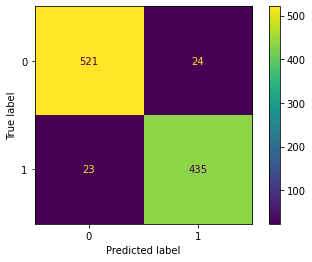

In [33]:
#Decision tree
model_DT = DecisionTreeClassifier()
model_DT.fit(xv_train,y_train)
DT_y_pred = model_DT.predict(xv_test)
score = accuracy_score(y_test,DT_y_pred)
print(f'Accuracy of DecisionTree model is: {round(score*100,2)}%')
report(model_DT)

Accuracy of RFC model is: 96.81%
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       545
           1       0.94      1.00      0.97       458

    accuracy                           0.97      1003
   macro avg       0.97      0.97      0.97      1003
weighted avg       0.97      0.97      0.97      1003



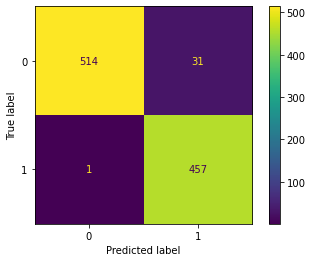

In [34]:
# Random Forest Classifier 
RFC_model = RandomForestClassifier(random_state=0)

RFC_model.fit(xv_train, y_train)

rfc_y_pred = RFC_model.predict(xv_test)

score = accuracy_score(y_test,rfc_y_pred)
print(f'Accuracy of RFC model is: {round(score*100,2)}%')

#**********************************************
report(RFC_model)

## 7. Tester le modéle

In [38]:

def fake_news_det(news):
    input_data = {"text":[news]}
    new_def_test = pd.DataFrame(input_data)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    #print(new_x_test)
    vectorized_input_data = vectorization.transform(new_x_test)
    prediction =RFC_model.predict(vectorized_input_data)
    
    if prediction == 1:
        print("Not a Fake News")
    else:
        print("Fake News")

In [39]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week.')

Not a Fake News


In [40]:
fake_news_det('order for the model to be able to determine whether an article presents factual information or simply fake news.')

Fake News


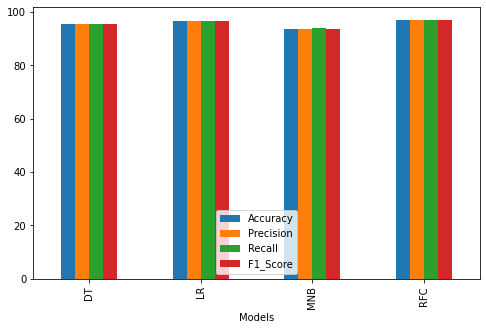

In [48]:
data=[["DT",95.31,95.50,95.5,95.5],
      ["LR",96.71,96.50,96.5,96.5],
      ["MNB",93.72,93.5,94,93.5],
      ["RFC",96.81,97,97,97]
     ]

df=pd.DataFrame(data,columns=["Models","Accuracy","Precision","Recall","F1_Score"])
df.plot(x="Models", y=["Accuracy", "Precision", "Recall","F1_Score"], kind="bar",figsize=(8,5))
plt.show()

In [ ]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week.')